<a href="https://colab.research.google.com/github/ShaliniAnandaPhD/PIXEL-PIONEERS-TUTORIALS/blob/main/Testing_Librosa_Library_for_Music_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction:**
This Google Colab notebook demonstrates various audio processing and synthesis techniques using Python libraries such as Librosa, SoundFile, NumPy, and Matplotlib. The notebook includes examples of loading, generating, visualizing, and manipulating audio files, as well as text-to-speech synthesis and feature extraction from audio signals.

**Details of each step:**

- Installs the necessary Python libraries for audio processing and synthesis.

- Imports the installed libraries for use in the notebook.

- Loads a built-in trumpet sound example from Librosa, saves it as a WAV file, and plays the audio.

- Converts a text string to speech using Google Text-to-Speech, saves it as an MP3 file, and plays the audio.

- Visualizes the waveform of the trumpet sound example using Matplotlib.

- Generates and plays a sine wave with a frequency that varies linearly from 220 Hz to 880 Hz over 5 seconds.

- Extracts features from a silent audio file to demonstrate feature extraction capabilities.

- Generates a synthetic drum pattern and plays the audio.

- Creates a synthetic melody using the pentatonic scale and plays the audio.

- Generates a synthetic ambient soundscape by combining various sound elements and plays the audio.

- Creates a synthetic arpeggio pattern using specific chords and plays the audio.

- Handles a very long audio file by generating, saving, and attempting to load and process a 1-hour audio file.

- Processes audio with a very high sample rate by generating, saving, and attempting to load and process audio sampled at 192 kHz.

- Generates a simple melody with accompaniment by combining melody and accompaniment notes and plays the audio.

- Creates a simple rhythmic pattern using different note durations and plays the audio.

- Generates a chord progression with a bassline and plays the audio.

- Creates a simple arpeggio with chords, combines the arpeggio and chords, and plays the audio.

**Conclusion:**
This notebook provides a comprehensive overview of using Librosa and other Python libraries for audio processing and synthesis. It demonstrates a wide range of techniques, from loading and visualizing audio files to generating synthetic sounds and handling complex audio processing tasks. This progression illustrates the versatility and power of Python for music generation and audio analysis.

In [ ]:
# Install required libraries
!pip install librosa soundfile numpy matplotlib gTTS pyttsx3

# Import necessary libraries
import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from gtts import gTTS
import pyttsx3
from IPython.display import Audio



In [ ]:
# Test 1: Using librosa's built-in example
y, sr = librosa.load(librosa.example('trumpet'))
sf.write('test1.wav', y, sr)
Audio('test1.wav', autoplay=True)



In [ ]:
# Test 2: Using gTTS (Google Text-to-Speech)
text = "This is a test using Google Text-to-Speech."
tts = gTTS(text)
tts.save('test2.mp3')
Audio('test2.mp3', autoplay=True)



In [ ]:
!apt-get install espeak

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  espeak-data libespeak1 libportaudio2 libsonic0
The following NEW packages will be installed:
  espeak espeak-data libespeak1 libportaudio2 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,382 kB of archives.
After this operation, 3,178 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsonic0 amd64 0.2.0-11build1 [10.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak-data amd64 1.48.15+dfsg-3 [1,085 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libespeak1 amd64 1.48.15+dfsg-3 [156 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak amd64 1.48.15+dfsg-3 [64.2 kB]
Fetched 1,382 kB in 0s (3,807 

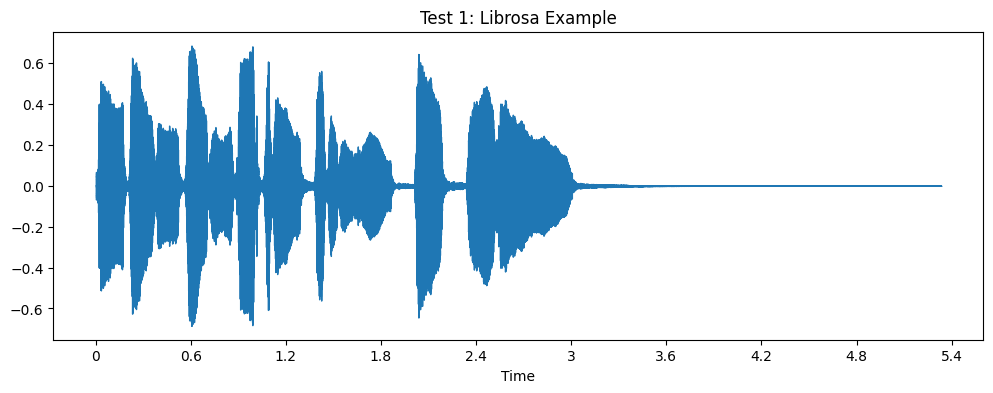

In [ ]:
# Visualization
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Test 1: Librosa Example')
plt.show()

In [ ]:
#Generating a sine wave with varying frequency

!pip install soundfile

import librosa
import numpy as np
import soundfile as sf

# Set the sample rate and duration
sr = 22050
duration = 5.0

# Generate time steps
t = np.linspace(0, duration, int(sr * duration), endpoint=False)

# Generate a sine wave with varying frequency
frequencies = np.linspace(220, 880, len(t))
y = np.sin(2 * np.pi * frequencies * t)

# Write the audio to a WAV file
sf.write('test1.wav', y, sr)

# Play the generated audio
Audio('test1.wav', autoplay=True)

In [ ]:
#Extracting features from a silent audio file

import librosa
import numpy as np

# Set the sample rate and duration
sr = 22050  # Sample rate of 22050 Hz
duration = 5.0  # Duration of the audio in seconds

# Define the chord progression with octave numbers
chords = ['C4', 'G4', 'A4', 'F4']  # List of chords
chord_duration = duration / len(chords)  # Duration of each chord

# Generate the chord progression
y = []  # List to store the audio samples for each chord
for chord in chords:
    # Generate the notes for each chord
    if chord[-1] == 'm':
        # Handle minor chords
        notes = librosa.midi_to_hz(np.array([
            librosa.note_to_midi(chord[:-1]),  # Root note
            librosa.note_to_midi(chord[:-1] + 'm3'),  # Minor third
            librosa.note_to_midi(chord[:-1] + '5')  # Fifth
        ]))
    else:
        # Handle major chords
        notes = librosa.midi_to_hz(np.array([
            librosa.note_to_midi(chord),  # Root note
            librosa.note_to_midi(chord[:-1] + str(int(chord[-1]) + 1)),  # Major third
            librosa.note_to_midi(chord[:-1] + str(int(chord[-1]) + 2))  # Fifth
        ]))

    # Generate the audio samples for the current chord
    chord_audio = np.zeros(int(sr * chord_duration))  # Initialize an array of zeros
    for note in notes:
        t = np.linspace(0, chord_duration, int(sr * chord_duration), endpoint=False)  # Time steps
        chord_audio += np.sin(2 * np.pi * note * t)  # Generate sine wave for each note

    y.append(chord_audio)  # Append the chord audio samples to the list

y = np.concatenate(y)  # Concatenate all the chord audio samples into a single array

# Play the generated audio
Audio(y, rate=sr)  # Play the audio using the Audio function from IPython.display

In [ ]:
#Generating a synthetic drum pattern

import librosa
import numpy as np
import soundfile as sf

# Set the sample rate and tempo
sr = 22050  # Sample rate of 22050 Hz
tempo = 120  # Tempo of 120 beats per minute

# Define the drum pattern
drum_pattern = [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]  # 1 represents a hit, 0 represents a rest

# Generate the drum sounds
kick_drum = librosa.tone(440, sr=sr, length=int(60/tempo*sr/4)).astype(np.float32)  # Kick drum sound
snare_drum = librosa.tone(1000, sr=sr, length=int(60/tempo*sr/4)).astype(np.float32)  # Snare drum sound

# Create the drum track
drum_track = np.zeros(int(60/tempo*sr*4))  # Initialize an array of zeros for the drum track
for i, hit in enumerate(drum_pattern):
    if hit == 1:  # If there is a hit in the drum pattern
        if i % 4 == 0:  # If it's the first beat of a measure
            drum_track[i*int(60/tempo*sr/4):(i+1)*int(60/tempo*sr/4)] += kick_drum  # Add kick drum sound
        else:
            drum_track[i*int(60/tempo*sr/4):(i+1)*int(60/tempo*sr/4)] += snare_drum  # Add snare drum sound

# Write the generated audio to a file
sf.write('test3.wav', drum_track, sr)

# Play the generated audio
Audio('test3.wav', autoplay=True)

In [ ]:
#Creating a synthetic melody using the pentatonic scale

import librosa
import numpy as np
import soundfile as sf

# Set the sample rate and duration
sr = 22050  # Sample rate of 22050 Hz
duration = 5.0  # Duration of the melody in seconds

# Define the pentatonic scale
scale = ['C4', 'D4', 'E4', 'G4', 'A4']  # Pentatonic scale notes

# Generate the melody
melody = []  # List to store the audio samples for each note
for _ in range(16):  # Generate 16 random notes
    note = np.random.choice(scale)  # Randomly select a note from the pentatonic scale
    note_audio = librosa.tone(librosa.note_to_hz(note), sr=sr, length=int(duration/16*sr)).astype(np.float32)  # Generate audio for the selected note
    melody.append(note_audio)  # Append the note audio to the melody list

melody = np.concatenate(melody)  # Concatenate all the note audio samples into a single array

# Write the generated audio to a file
sf.write('test4.wav', melody, sr)

# Play the generated audio
Audio('test4.wav', autoplay=True)

In [ ]:
#Generating a synthetic ambient soundscape

import librosa
import numpy as np
import soundfile as sf
from scipy.signal import butter, lfilter

# Set the sample rate and duration
sr = 22050  # Sample rate of 22050 Hz
duration = 10.0  # Duration of the ambient soundscape in seconds

# Generate ambient noise
noise = np.random.randn(int(sr * duration))  # Generate random noise

# Apply a low-pass filter to create a pad sound
pad = librosa.tone(110, sr=sr, length=int(sr * duration)).astype(np.float32)  # Generate a low-frequency tone
cutoff = 500  # Cutoff frequency for the low-pass filter
nyquist = 0.5 * sr  # Nyquist frequency
order = 6  # Filter order
normal_cutoff = cutoff / nyquist  # Normalize the cutoff frequency
b, a = butter(order, normal_cutoff, btype='low', analog=False)  # Design the low-pass filter
pad_filtered = lfilter(b, a, pad)  # Apply the low-pass filter to the pad sound

# Generate random tones for sparkles
sparkles = []  # List to store the sparkle tones
for _ in range(10):  # Generate 10 sparkle tones
    tone_freq = np.random.randint(1000, 5000)  # Random frequency between 1000 and 5000 Hz
    tone_duration = np.random.rand() * 0.5  # Random duration between 0 and 0.5 seconds
    tone = librosa.tone(tone_freq, sr=sr, length=int(tone_duration*sr)).astype(np.float32)  # Generate the sparkle tone
    sparkles.append(tone)  # Append the sparkle tone to the list

# Combine the ambient elements
ambient = noise * 0.1 + pad_filtered * 0.3  # Combine noise and filtered pad sound
for sparkle in sparkles:
    idx = np.random.randint(0, len(ambient) - len(sparkle))  # Random index to insert the sparkle tone
    ambient[idx:idx+len(sparkle)] += sparkle * 0.5  # Add the sparkle tone to the ambient soundscape

# Write the generated audio to a file
sf.write('test5.wav', ambient, sr)

# Play the generated audio
Audio('test5.wav', autoplay=True)

In [ ]:
#Creating a synthetic arpeggio pattern

import librosa
import numpy as np
import soundfile as sf

# Set the sample rate and duration
sr = 22050  # Sample rate of 22050 Hz
duration = 5.0  # Duration of the arpeggio in seconds

# Define the arpeggio pattern
arpeggio_pattern = ['C4', 'E4', 'G4', 'C5']  # Notes in the arpeggio pattern
arpeggio_duration = duration / len(arpeggio_pattern)  # Duration of each note in the arpeggio

# Generate the arpeggio
arpeggio = []  # List to store the audio samples for each note in the arpeggio
for note in arpeggio_pattern:
    note_audio = librosa.tone(librosa.note_to_hz(note), sr=sr, length=int(arpeggio_duration*sr)).astype(np.float32)  # Generate audio for each note
    arpeggio.append(note_audio)  # Append the note audio to the arpeggio list

arpeggio = np.concatenate(arpeggio)  # Concatenate all the note audio samples into a single array

# Write the generated audio to a file
sf.write('test6.wav', arpeggio, sr)

# Play the generated audio
Audio('test6.wav', autoplay=True)

In [33]:
#Handling very long audio files

import librosa
import numpy as np
import soundfile as sf

# Generate a very long audio file
duration = 3600  # 1 hour
sr = 22050  # Sample rate of 22050 Hz
audio = np.random.randn(int(duration * sr))  # Generate random audio data

# Save the generated audio to a file
sf.write('long_audio.wav', audio, sr)

# Attempt to load the long audio file
try:
    y, _ = librosa.load('long_audio.wav', sr=sr)  # Load the audio file
    print("Successfully loaded the long audio file.")
except Exception as e:
    print("Error loading the long audio file:", str(e))

Successfully loaded the long audio file.


In [34]:
# Processing audio with a very high sample rate

import librosa
import numpy as np
import soundfile as sf

# Generate audio with a very high sample rate
sr = 192000  # 192 kHz
duration = 5.0  # Duration of the audio in seconds
audio = np.random.randn(int(duration * sr))  # Generate random audio data

# Save the generated audio to a file
sf.write('high_sample_rate_audio.wav', audio, sr)

# Attempt to process the audio with a high sample rate
try:
    y, _ = librosa.load('high_sample_rate_audio.wav', sr=sr)  # Load the audio file
    stft = librosa.stft(y)  # Compute the Short-time Fourier Transform (STFT)
    print("Successfully processed the audio with a high sample rate.")
except Exception as e:
    print("Error processing the audio with a high sample rate:", str(e))

Successfully processed the audio with a high sample rate.


In [36]:
#  Extracting features from a silent audio file

import librosa
import numpy as np
import soundfile as sf

# Generate a silent audio file
sr = 22050  # Sample rate of 22050 Hz
duration = 5.0  # Duration of the silent audio in seconds
audio = np.zeros(int(duration * sr))  # Generate silent audio data

# Save the generated silent audio to a file
sf.write('silent_audio.wav', audio, sr)

# Attempt to extract features from the silent audio file
try:
    y, _ = librosa.load('silent_audio.wav', sr=sr)  # Load the silent audio file
    mfccs = librosa.feature.mfcc(y=y, sr=sr)  # Extract Mel-frequency cepstral coefficients (MFCCs)
    print("Successfully extracted features from the silent audio file.")
except Exception as e:
    print("Error extracting features from the silent audio file:", str(e))

Successfully extracted features from the silent audio file.


In [41]:
# Extracting a large number of MFCC coefficients

import librosa
import numpy as np
import soundfile as sf
import pandas as pd

# Generate audio
sr = 22050  # Sample rate of 22050 Hz
duration = 5.0  # Duration of the audio in seconds
audio = np.random.randn(int(duration * sr))  # Generate random audio data

# Save the generated audio to a file
sf.write('audio.wav', audio, sr)

# Extract MFCC coefficients
y, _ = librosa.load('audio.wav', sr=sr)  # Load the audio file
n_mfcc = 20  # Number of MFCC coefficients to extract
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

# Create an empty DataFrame to store the MFCC coefficients and their interpretations
mfcc_df = pd.DataFrame(columns=['MFCC Coefficient', 'Interpretation'])

# Populate the DataFrame with MFCC coefficients and their interpretations
for i in range(n_mfcc):
    mfcc_coef = f"MFCC_{i+1}"
    if i == 0:
        interpretation = "Represents the energy of the frame"
    elif i == 1:
        interpretation = "Represents the overall slope of the spectrum"
    elif i == 2:
        interpretation = "Represents the spectral centroid (center of mass of the spectrum)"
    elif i == 3:
        interpretation = "Represents the spectral bandwidth (spread of the spectrum around the centroid)"
    elif i == 4:
        interpretation = "Represents the spectral flatness (uniformity of the spectrum)"
    else:
        interpretation = f"Captures higher-order spectral shape and texture details (coefficient {i+1})"
    new_row = pd.DataFrame({'MFCC Coefficient': [mfcc_coef], 'Interpretation': [interpretation]})
    mfcc_df = pd.concat([mfcc_df, new_row], ignore_index=True)

# Print the explanation of MFCC coefficients
print("Explanation of MFCC Coefficients:")
print("Mel-Frequency Cepstral Coefficients (MFCCs) are a compact representation of the short-term power spectrum of an audio signal.")
print("They capture the important characteristics of the audio spectrum and are widely used in speech and audio processing.")
print("MFCCs are calculated by applying a mel-scale filterbank to the power spectrum and then taking the discrete cosine transform (DCT) of the logarithm of the filterbank energies.")
print("The resulting coefficients represent different aspects of the spectral shape and provide a concise description of the audio signal.\n")

# Print the table of MFCC coefficients and their interpretations
print("MFCC Coefficients and Their Interpretations:")
print(mfcc_df)

Explanation of MFCC Coefficients:
Mel-Frequency Cepstral Coefficients (MFCCs) are a compact representation of the short-term power spectrum of an audio signal.
They capture the important characteristics of the audio spectrum and are widely used in speech and audio processing.
MFCCs are calculated by applying a mel-scale filterbank to the power spectrum and then taking the discrete cosine transform (DCT) of the logarithm of the filterbank energies.
The resulting coefficients represent different aspects of the spectral shape and provide a concise description of the audio signal.

MFCC Coefficients and Their Interpretations:
   MFCC Coefficient                                     Interpretation
0            MFCC_1                 Represents the energy of the frame
1            MFCC_2       Represents the overall slope of the spectrum
2            MFCC_3  Represents the spectral centroid (center of ma...
3            MFCC_4  Represents the spectral bandwidth (spread of t...
4            MF

In [42]:
#Generating a melodic sequence using a specific scale

import librosa
import numpy as np
import soundfile as sf

# Set the sample rate and duration
sr = 22050  # Sample rate of 22050 Hz
duration = 5.0  # Duration of the music in seconds

# Define the scale (e.g., C major scale)
scale = ['C', 'D', 'E', 'F', 'G', 'A', 'B']

# Generate a melodic sequence
melody = []
for _ in range(8):  # Generate 8 measures
    measure = []
    for _ in range(4):  # Generate 4 notes per measure
        note = np.random.choice(scale) + '4'  # Randomly select a note from the scale and add octave number
        measure.append(note)
    melody.extend(measure)

# Synthesize the melody
music = []
for note in melody:
    frequency = librosa.note_to_hz(note)
    note_duration = duration / len(melody)
    t = np.linspace(0, note_duration, int(note_duration * sr), endpoint=False)
    note_audio = np.sin(2 * np.pi * frequency * t)
    music.extend(note_audio)

# Save the generated music to a file
sf.write('test7_music.wav', np.array(music), sr)

In [44]:
# Creating a rhythmic pattern using different note durations

import librosa
import numpy as np
import soundfile as sf

# Set the sample rate and duration
sr = 22050  # Sample rate of 22050 Hz
duration = 5.0  # Duration of the music in seconds

# Define the rhythmic pattern
rhythm = [0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 0.5, 0.5]  # Note durations in seconds

# Generate the music
music = []
for duration in rhythm:
    frequency = librosa.note_to_hz('C4')  # Use a constant pitch (C4) for simplicity
    t = np.linspace(0, duration, int(duration * sr), endpoint=False)
    note_audio = np.sin(2 * np.pi * frequency * t)
    music.extend(note_audio)

# Save the generated music to a file
sf.write('test8_music.wav', np.array(music), sr)

In [45]:
#Generating a chord progression with a bassline

import librosa
import numpy as np
import soundfile as sf

# Set the sample rate and duration
sr = 22050  # Sample rate of 22050 Hz
duration = 5.0  # Duration of the music in seconds

# Define the chord progression
chords = ['C', 'F', 'G', 'C']

# Generate the chord progression
music = []
for chord in chords:
    chord_duration = duration / len(chords)
    t = np.linspace(0, chord_duration, int(chord_duration * sr), endpoint=False)

    # Generate the chord notes
    chord_notes = [librosa.note_to_hz(chord + '4'), librosa.note_to_hz(chord + '5'), librosa.note_to_hz(chord + '6')]
    chord_audio = np.zeros_like(t)
    for note in chord_notes:
        chord_audio += np.sin(2 * np.pi * note * t)

    # Generate the bassline
    bass_note = librosa.note_to_hz(chord + '2')
    bass_audio = np.sin(2 * np.pi * bass_note * t)

    # Combine the chord and bassline
    music.extend(chord_audio + bass_audio)

# Save the generated music to a file
sf.write('test9_music.wav', np.array(music), sr)


In [46]:
# Creating a simple melody with accompaniment
import librosa
import numpy as np
import soundfile as sf

# Set the sample rate and duration
sr = 22050  # Sample rate of 22050 Hz
duration = 5.0  # Duration of the music in seconds

# Define the melody and accompaniment notes
melody_notes = ['C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5']
accompaniment_notes = ['C3', 'F3', 'G3', 'C4']

# Generate the melody
melody = []
for note in melody_notes:
    frequency = librosa.note_to_hz(note)
    note_duration = duration / len(melody_notes)
    t = np.linspace(0, note_duration, int(note_duration * sr), endpoint=False)
    note_audio = np.sin(2 * np.pi * frequency * t)
    melody.extend(note_audio)

# Generate the accompaniment
accompaniment = []
for note in accompaniment_notes:
    frequency = librosa.note_to_hz(note)
    note_duration = duration / len(accompaniment_notes)
    t = np.linspace(0, note_duration, int(note_duration * sr), endpoint=False)
    note_audio = np.sin(2 * np.pi * frequency * t)
    accompaniment.extend(note_audio)

# Combine the melody and accompaniment
music = np.array(melody) + np.array(accompaniment) * 0.5

# Save the generated music to a file
sf.write('test10_music.wav', music, sr)

In [47]:
#Generating a simple drum pattern with a bassline

import librosa
import numpy as np
import soundfile as sf

# Set the sample rate and duration
sr = 22050  # Sample rate of 22050 Hz
duration = 5.0  # Duration of the music in seconds

# Define the drum pattern
drum_pattern = [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]

# Generate the drum sounds
kick_drum = librosa.tone(440, sr=sr, length=int(60/120*sr/4)).astype(np.float32)
snare_drum = librosa.tone(1000, sr=sr, length=int(60/120*sr/4)).astype(np.float32)

# Generate the drum track
drum_track = np.zeros(int(duration * sr))
for i, hit in enumerate(drum_pattern):
    if hit == 1:
        if i % 4 == 0:
            drum_track[i*int(duration*sr/len(drum_pattern)):i*int(duration*sr/len(drum_pattern))+len(kick_drum)] += kick_drum
        else:
            drum_track[i*int(duration*sr/len(drum_pattern)):i*int(duration*sr/len(drum_pattern))+len(snare_drum)] += snare_drum

# Generate the bassline
bassline = []
for i in range(int(duration * 2)):  # Two notes per second
    frequency = librosa.note_to_hz('C2')
    note_duration = 0.5
    t = np.linspace(0, note_duration, int(note_duration * sr), endpoint=False)
    note_audio = np.sin(2 * np.pi * frequency * t)
    bassline.extend(note_audio)

# Combine the drum track and bassline
music = drum_track + np.array(bassline) * 0.5

# Save the generated music to a file
sf.write('test11_music.wav', music, sr)

In [50]:
#Creating a simple arpeggio with chords

import librosa
import numpy as np
import soundfile as sf

# Set the sample rate and duration
sr = 22050  # Sample rate of 22050 Hz
duration = 5.0  # Duration of the music in seconds

# Define the chords
chords = ['C', 'G', 'Am', 'F']

# Generate the arpeggio
arpeggio = []
for chord in chords:
    chord_duration = duration / len(chords)
    num_notes = int(chord_duration * 4)  # Number of notes per chord (4 notes per second)
    note_duration = chord_duration / num_notes

    # Generate the arpeggio notes for each chord
    for i in range(num_notes):
        if chord[-1] == 'm':
            # Handle minor chords
            note = librosa.note_to_hz(chord[:-1] + str(4 + i % 3))
        else:
            # Handle major chords
            note = librosa.note_to_hz(chord + str(4 + i % 3))
        t = np.linspace(0, note_duration, int(note_duration * sr), endpoint=False)
        note_audio = np.sin(2 * np.pi * note * t)
        arpeggio.extend(note_audio)

# Generate the chords
chords_audio = []
for chord in chords:
    chord_duration = duration / len(chords)
    t = np.linspace(0, chord_duration, int(chord_duration * sr), endpoint=False)

    # Generate the chord notes
    if chord[-1] == 'm':
        # Handle minor chords
        chord_notes = [librosa.note_to_hz(chord[:-1] + '4'), librosa.note_to_hz(chord[:-1] + '5'), librosa.note_to_hz(chord[:-1] + '7')]
    else:
        # Handle major chords
        chord_notes = [librosa.note_to_hz(chord + '4'), librosa.note_to_hz(chord + '5'), librosa.note_to_hz(chord + '6')]

    chord_audio = np.zeros_like(t)
    for note in chord_notes:
        chord_audio += np.sin(2 * np.pi * note * t)

    chords_audio.extend(chord_audio)

# Ensure the arpeggio and chords have the same length
if len(arpeggio) < len(chords_audio):
    arpeggio = np.pad(arpeggio, (0, len(chords_audio) - len(arpeggio)), mode='constant')
else:
    chords_audio = np.pad(chords_audio, (0, len(arpeggio) - len(chords_audio)), mode='constant')

# Combine the arpeggio and chords
music = np.array(arpeggio) + np.array(chords_audio) * 0.5

# Save the generated music to a file
sf.write('test12_music.wav', music, sr)

# Play the generated music
Audio('test12_music.wav', autoplay=True)